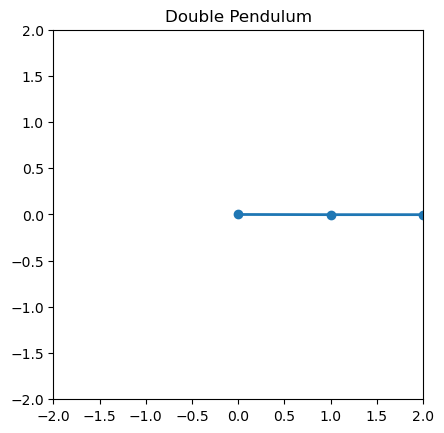

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
g = 9.81
L1, L2 = 1.0, 1.0
m1, m2 = 1.0, 1.0

theta1_0 = np.pi / 2   # initial angle top pendulum
theta2_0 = np.pi / 2   # initial angle lower pendulum
omega1_0 = 0.0
omega2_0 = 0.0

dt = 0.02
steps = 1000

def derivs(state):
    theta1, omega1, theta2, omega2 = state
    delta = theta2 - theta1

    denom1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) * np.cos(delta)
    denom2 = (L2 / L1) * denom1

    d_omega1 = (
        m2 * L1 * omega1 * omega1 * np.sin(delta) * np.cos(delta)
        + m2 * g * np.sin(theta2) * np.cos(delta)
        + m2 * L2 * omega2 * omega2 * np.sin(delta)
        - (m1 + m2) * g * np.sin(theta1)
    ) / denom1

    d_omega2 = (
        - m2 * L2 * omega2 * omega2 * np.sin(delta) * np.cos(delta)
        + (m1 + m2) * g * np.sin(theta1) * np.cos(delta)
        - (m1 + m2) * L1 * omega1 * omega1 * np.sin(delta)
        - (m1 + m2) * g * np.sin(theta2)
    ) / denom2

    return np.array([omega1, d_omega1, omega2, d_omega2])

state = np.array([theta1_0, omega1_0, theta2_0, omega2_0])
states = []
for _ in range(steps):
    # RK4 integration
    k1 = dt * derivs(state)
    k2 = dt * derivs(state + 0.5 * k1)
    k3 = dt * derivs(state + 0.5 * k2)
    k4 = dt * derivs(state + k3)
    state += (k1 + 2*k2 + 2*k3 + k4) / 6
    states.append(state.copy())

states = np.array(states)
theta1s = states[:, 0]
theta2s = states[:, 2]

x1 = L1 * np.sin(theta1s)
y1 = -L1 * np.cos(theta1s)
x2 = x1 + L2 * np.sin(theta2s)
y2 = y1 - L2 * np.cos(theta2s)

fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '-', color='r', lw=1, alpha=0.5)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_title("Double Pendulum")
ax.set_aspect('equal')

def animate(i):
    line.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    trace.set_data(x2[:i], y2[:i])
    return line, trace

ani = FuncAnimation(fig, animate, frames=steps, interval=10, blit=True)
plt.show()
